In [1]:
!pip install pandas matplotlib scikit-learn seaborn numpy

In [2]:
import pandas as pd

# Specify the path to the local Excel file
file_path = r"C:\Users\subag\Downloads\GitHub\properties\properties.csv" # 

try:
    # Attempt to read the Excel file into a DataFrame
    df = pd.read_csv(file_path)
    
    # If successful, print a success message
    print('Data downloaded and read into a dataframe!')
except Exception as e:
    # If unsuccessful, print an error message
    print(f'Failed to retrieve data from the Excel file. Error: {e}')


Data downloaded and read into a dataframe!


In [3]:
df

,Unnamed: 0,Address,AreaName,Price ($),lat,lng
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
...,...,...,...,...,...,...
25346,124922,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,154900,45.353519,-75.807793
25347,124924,"5827 GLADEWOODS PLACE Ottawa, ON",Orléans,624900,45.441273,-75.532745
25348,124925,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249
25349,124928,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,295000,45.453838,-75.650040


In [4]:
df = df.drop(columns='Unnamed: 0')
df

,Address,AreaName,Price ($),lat,lng
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
...,...,...,...,...,...
25346,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,154900,45.353519,-75.807793
25347,"5827 GLADEWOODS PLACE Ottawa, ON",Orléans,624900,45.441273,-75.532745
25348,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249
25349,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,295000,45.453838,-75.650040


In [5]:
# Count duplicates in the 'address' column
duplicate_count_df = df.duplicated(subset=['Address']).sum()

print("Number of duplicates in the address column:", duplicate_count_df)

Number of duplicates in the address column: 1757


In [6]:
# Find duplicate addresses as a DataFrame
duplicate_addresses_df = df[df.duplicated(subset=['Address'], keep=False)]

print("Duplicate addresses:")
duplicate_addresses_df

Duplicate addresses:


,Address,AreaName,Price ($),lat,lng
6,"532 Caledonia Rd Toronto, ON",Fairbank,25,43.691193,-79.461662
7,"11 REBECCA Street Hamilton, ON",Central Hamilton,254900,43.258541,-79.867615
21,"430 Military Tr Toronto, ON",Morningside,675000,43.788639,-79.207932
29,"2 Moraine Hill Dr Toronto, ON",Tam O'Shanter,698000,43.774624,-79.298141
32,"20 Shrewsbury Sq Toronto, ON",Tam O'Shanter - Sullivan,145,43.772118,-79.309311
...,...,...,...,...,...
25260,"618 Erbsville Road Waterloo, ON",Laurelwood,1015000,43.474682,-80.597023
25285,"35 SOUTHSHORE Crescent Stoney Creek, ON",Stoney Creek,0,43.227219,-79.719559
25305,"131 BRIDGEPORT Road E Waterloo, ON",Waterloo,450000,43.470795,-80.510536
25318,"467 CHARLTON Avenue Hamilton, ON",Stinson,240500,43.245850,-79.854652


In [7]:
# Get unique addresses
unique_addresses_df = duplicate_addresses_df['Address'].unique()

print("Unique addresses:")
unique_addresses_df

Unique addresses:


array(['532 Caledonia Rd Toronto, ON', '11 REBECCA Street Hamilton, ON',
       '430 Military Tr Toronto, ON', ...,
       '3129 REGIONAL RD 174 HIGHWAY Ottawa, ON',
       '0 Ball Rd Hamilton Township, ON', '11 John Street Guelph, ON'],
      dtype=object)

In [8]:
# Create a DataFrame from unique addresses
unique_addresses_df_1 = pd.DataFrame({'Unique Address': unique_addresses_df})

print("Unique addresses as DataFrame:")
unique_addresses_df_1

Unique addresses as DataFrame:


,Unique Address
0,"532 Caledonia Rd Toronto, ON"
1,"11 REBECCA Street Hamilton, ON"
2,"430 Military Tr Toronto, ON"
3,"2 Moraine Hill Dr Toronto, ON"
4,"20 Shrewsbury Sq Toronto, ON"
...,...
1476,"131 BRUYERE STREET Ottawa, ON"
1477,"52 BARTON Street East Hamilton, ON"
1478,"3129 REGIONAL RD 174 HIGHWAY Ottawa, ON"
1479,"0 Ball Rd Hamilton Township, ON"


In [9]:
# Drop duplicates in the address column
df = df.drop_duplicates(subset=['Address'])

print("DataFrame after dropping duplicates:")
df

DataFrame after dropping duplicates:


,Address,AreaName,Price ($),lat,lng
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
...,...,...,...,...,...
25346,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,154900,45.353519,-75.807793
25347,"5827 GLADEWOODS PLACE Ottawa, ON",Orléans,624900,45.441273,-75.532745
25348,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249
25349,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,295000,45.453838,-75.650040


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [11]:
df.dtypes

Address       object
AreaName      object
Price ($)      int64
lat          float64
lng          float64
dtype: object

In [12]:
df.describe()

,Price ($),lat,lng
count,2.359400e+04,23594.000000,23594.000000
mean,5.606318e+05,37.159619,-85.357042
std,8.445366e+05,83.994176,74.096015
min,0.000000e+00,-999.000000,-999.000000
25%,2.200000e+05,43.412430,-80.287590
50%,3.699000e+05,43.724766,-79.488228
75%,6.080750e+05,44.491020,-79.092318
max,3.250000e+07,53.851017,1.074519


In [13]:
df.isnull().sum()

Address        0
AreaName     454
Price ($)      0
lat            0
lng            0
dtype: int64

In [14]:
df.shape

(23594, 5)

In [15]:

all_outliers = df[(df['lat'] < 41.675105) | (df['lng'] < -95.15625) | (df['lat'] > 56.8500) | (df['lng'] > -74.28125)].index
df = df.drop(all_outliers) #no need inplace=True since df= part
df.reset_index(drop=True, inplace=True)


<Figure size 640x480 with 0 Axes>

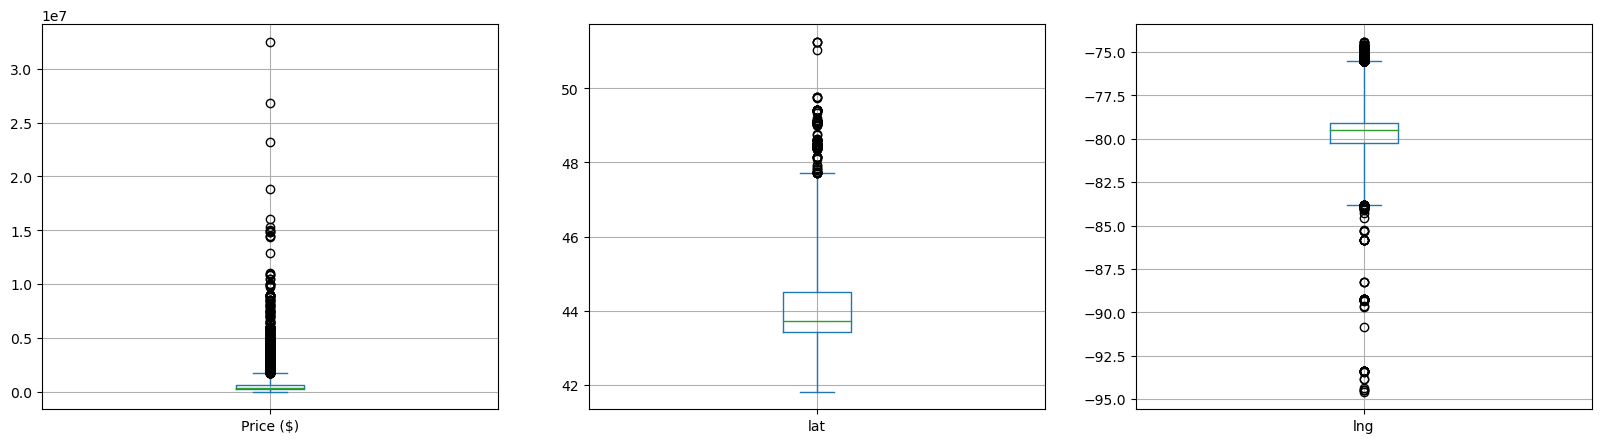

In [16]:
import matplotlib.pyplot as plt
plt.suptitle('Box plots to find outliers')
fig,axes = plt.subplots(1,3,figsize=(20,5))
df[['Price ($)']].plot(kind='box',whis=3, grid=True, ax = axes[0])
df[['lat']].plot(kind='box',whis=3, grid=True, ax = axes[1])
df[['lng']].plot(kind='box',whis=3, grid=True, ax = axes[2])


plt.show()

In [17]:
summary_stats=df.describe()
summary_stats

,Price ($),lat,lng
count,2.341800e+04,23418.000000,23418.000000
mean,5.616716e+05,43.966730,-79.371962
std,8.469990e+05,1.004305,1.991136
min,0.000000e+00,41.814911,-94.579636
25%,2.220555e+05,43.425385,-80.265798
50%,3.699000e+05,43.727317,-79.484638
75%,6.090000e+05,44.497218,-79.086477
max,3.250000e+07,51.253777,-74.415070


In [18]:
Q1_price, Q1_lat, Q1_lng = summary_stats.loc['25%', ['Price ($)', 'lat', 'lng']]
Q3_price, Q3_lat, Q3_lng = summary_stats.loc['75%', ['Price ($)', 'lat', 'lng']]
IQR_price, IQR_lat, IQR_lng = summary_stats.loc['75%', ['Price ($)', 'lat', 'lng']]-summary_stats.loc['25%', ['Price ($)', 'lat', 'lng']]
# Create lists for Q3 and IQR
Q1 = [Q1_price, Q1_lat, Q1_lng]
Q3 = [Q3_price, Q3_lat, Q3_lng]
IQR = [IQR_price, IQR_lat, IQR_lng]

# Calculate the upper bound for outliers
Upper_Outlier_Index = [q + 3 * iqr for q, iqr in zip(Q3, IQR)] #3 insted of 1.5
Lower_Outlier_Index=[q - 1.5 * iqr for q, iqr in zip(Q1, IQR)]

In [19]:
print("Upper Outlier Index:", Upper_Outlier_Index)
print("Lower Outlier Index:", Lower_Outlier_Index)

Upper Outlier Index: [1769833.5, 47.712715000000024, -75.54851350000004]
Lower Outlier Index: [-358361.25, 41.81763624999999, -82.03478037499997]


In [20]:
all_outliers_df = df[(df['lat'] > Upper_Outlier_Index[1]) | (df['lng'] > Upper_Outlier_Index[2]) | (df['lat'] < Lower_Outlier_Index[1]) | (df['lng'] < Lower_Outlier_Index[2])].index


In [21]:
outliers_df = df.iloc[all_outliers_df].copy()
outliers_df

,Address,AreaName,Price ($),lat,lng
423,"385 Oaklawn Crescent Ottawa, ON",Orléans,339900,45.465637,-75.488403
439,"1838 PEPPERGRASS ROAD Ottawa, ON",Orléans,499000,45.480251,-75.465752
443,"1635 FRENETTE STREET Ottawa, ON",Orléans,419000,45.475910,-75.465561
446,"925 BEAUCLAIRE DRIVE Ottawa, ON",Orléans,389900,45.486462,-75.528824
447,"6163 RED WILLOW DRIVE Ottawa, ON",Orléans,279900,45.451088,-75.531372
...,...,...,...,...,...
23407,"V/L JOINVILLE V/L JOINVILLE Windsor, ON",Windsor,139900,42.314938,-83.036362
23408,"11766 RIVERSIDE E Windsor, ON",East Riverside,699900,42.333740,-82.900284
23409,"403 ANDERSON DRIVE Cornwall, ON",Cornwall,204900,45.031879,-74.692535
23412,"397 PHOENIX CRESCENT Orleans, ON",Orléans,314900,45.471764,-75.494957


In [22]:
df = df.drop(all_outliers_df)
df.reset_index(drop=True, inplace=True)

In [23]:
'''
all_outliers = df[(df['lat'] < 41.675105) | (df['lng'] < -95.15625) | (df['lat'] > 56.8500) | (df['lng'] > -74.28125)].index
df = df.drop(all_outliers) #no need inplace=True since df= part
df.reset_index(drop=True, inplace=True)
'''

"\nall_outliers = df[(df['lat'] < 41.675105) | (df['lng'] < -95.15625) | (df['lat'] > 56.8500) | (df['lng'] > -74.28125)].index\ndf = df.drop(all_outliers) #no need inplace=True since df= part\ndf.reset_index(drop=True, inplace=True)\n"

<Figure size 640x480 with 0 Axes>

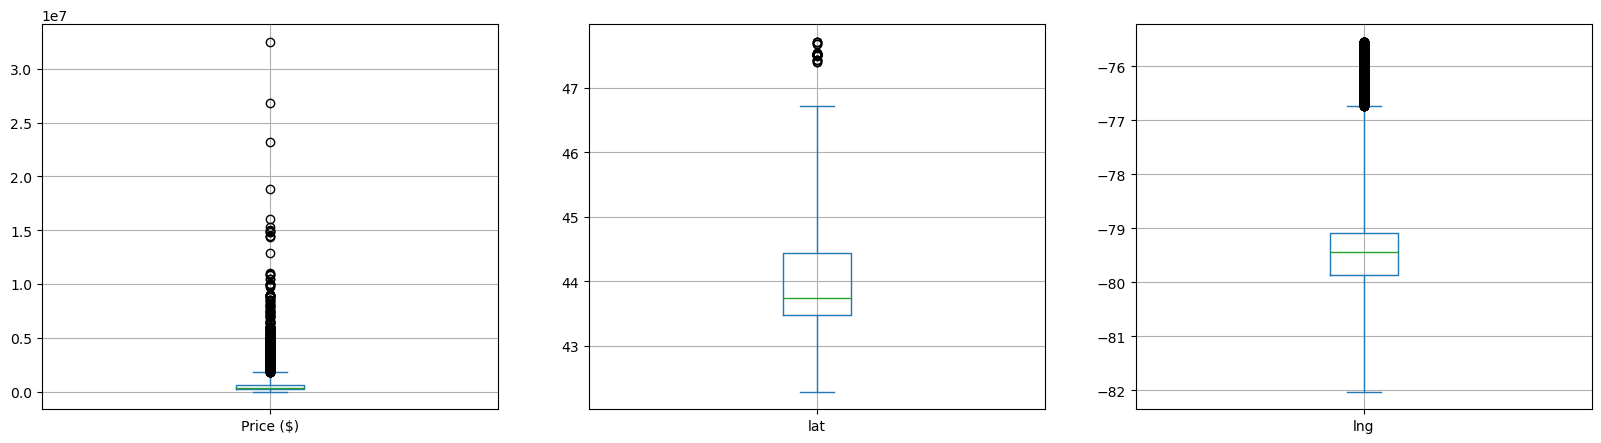

In [24]:
plt.suptitle('Box plots to find outliers')
fig,axes = plt.subplots(1,3,figsize=(20,5))
df[['Price ($)']].plot(kind='box',whis=3, grid=True, ax = axes[0])
df[['lat']].plot(kind='box',whis=3, grid=True, ax = axes[1])
df[['lng']].plot(kind='box',whis=3, grid=True, ax = axes[2])


plt.show()

In [25]:
df_null = df[df['AreaName'].isna()]#or isnull()
df_null = df_null.reset_index(drop=True)
print("Entries with null Area Name:")
df_null

Entries with null Area Name:


,Address,AreaName,Price ($),lat,lng
0,"7393 Wellington Rd 51 . Ariss, ON",NaN,699000,43.596718,-80.340660
1,"152 MARR Drive Elora, ON",NaN,399900,43.693314,-80.437492
2,"17 Dan Sheehan Lane Clarington, ON",NaN,550000,43.931091,-78.707405
3,328 Wicklow Beach Rd Alnwick Haldimand Townshi...,NaN,629000,43.976543,-77.962921
4,"WALKER LAKE DR WALKER LAKE DR Lake Of Bays, ON",NaN,69900,45.378361,-79.092339
...,...,...,...,...,...
258,"Boughner Rd Haliburton, ON",NaN,45900,45.084507,-78.484268
259,"4th Conc Road Haliburton, ON",NaN,550000,45.046715,-78.508492
260,"7256 Wellington Road 124 Road Guelph, ON",NaN,499900,43.494778,-80.285805
261,"7985 Tait`s Beach Rd Hamilton Township, ON",NaN,599000,44.109016,-78.273743


In [26]:
#df_N_null = df.dropna(subset=['AreaName'])
df_n_null = df[df['AreaName'].notna()]
df_n_null = df_n_null.reset_index(drop=True)
#bayshore_data = df[df['Area Name'] == 'Bayshore']

# Display the DataFrame after dropping null entries
print("DataFrame after dropping null Area Name entries:")
df_n_null

DataFrame after dropping null Area Name entries:


,Address,AreaName,Price ($),lat,lng
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
...,...,...,...,...,...
20641,"4182 THOMAS ALTON Boulevard Burlington, ON",Burlington,699900,43.397976,-79.823456
20642,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,154900,45.353519,-75.807793
20643,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249
20644,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,295000,45.453838,-75.650040


In [27]:
#df_n_null.isnull().sum()

In [28]:
df_n_null.describe()

,Price ($),lat,lng
count,2.064600e+04,20646.000000,20646.000000
mean,5.922383e+05,44.005517,-79.146947
std,8.813128e+05,0.812171,1.560275
min,0.000000e+00,42.290249,-82.025764
25%,2.449000e+05,43.478283,-79.867188
50%,3.949000e+05,43.742146,-79.447258
75%,6.488860e+05,44.395063,-79.092735
max,3.250000e+07,47.712048,-75.548706


In [29]:
print(df_null.shape,df_n_null.shape)

(263, 5) (20646, 5)


In [30]:
# Use factorize to assign a unique number to each 'AreaName'
df_n_null['AreaCode'] = pd.factorize(df_n_null['AreaName'])[0]

# Display the DataFrame with the assigned numbers
df_n_null



,Address,AreaName,Price ($),lat,lng,AreaCode
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266,0
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396,1
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357,2
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403,3
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118,4
...,...,...,...,...,...,...
20641,"4182 THOMAS ALTON Boulevard Burlington, ON",Burlington,699900,43.397976,-79.823456,100
20642,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,154900,45.353519,-75.807793,655
20643,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249,306
20644,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,295000,45.453838,-75.650040,231


In [31]:
# Find the number of unique elements in the 'Area Name' column
unique_area_code = df_n_null['AreaCode'].nunique()

# Display the number of unique elements
print("Number of unique elements in the 'Area Name' column:", unique_area_code)

Number of unique elements in the 'Area Name' column: 977


In [32]:
# Assuming 'AreaCode' is the column with assigned numbers and 'AreaName' is the original area names
unique_area_df = df_n_null[['AreaCode', 'AreaName']].drop_duplicates().reset_index(drop=True)

# Display the DataFrame with unique area codes and names
#unique_area_df

In [33]:
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Extract the features (X) and the target variable (y)
X = df_n_null[['lat','lng']]
y = df_n_null['AreaCode']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


training_set = df_n_null.loc[X_train.index]
testing_set = df_n_null.loc[X_test.index]

print(X_train.shape,X_test.shape)

(16516, 2) (4130, 2)


In [34]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
# Evaluate the model
predictions = model.predict(X_test)


In [35]:
'''
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (Random Forests): {mae}')
'''

"\nfrom sklearn.metrics import mean_absolute_error\nmae = mean_absolute_error(y_test, predictions)\nprint(f'Mean Absolute Error (Random Forests): {mae}')\n"

In [36]:
from sklearn.metrics import r2_score

# Evaluate using R-squared
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

R-squared: 0.8410379198328565


In [37]:
#pred = predictions.astype(int)

In [38]:
'''
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
conf_matrix
'''

'\nfrom sklearn.metrics import confusion_matrix\n# Calculate the confusion matrix\nconf_matrix = confusion_matrix(y_test, pred)\nconf_matrix\n'

In [39]:
'''
# Plot the confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
'''

"\n# Plot the confusion matrix using seaborn\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nplt.figure(figsize=(8, 6))\nsns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)\nplt.xlabel('Predicted Labels')\nplt.ylabel('True Labels')\nplt.title('Confusion Matrix')\nplt.show()\n"

In [40]:
import warnings
warnings.filterwarnings('ignore') 
df_null['AreaCode'] = model.predict(df_null[['lat','lng']]).astype(int)
df_null

,Address,AreaName,Price ($),lat,lng,AreaCode
0,"7393 Wellington Rd 51 . Ariss, ON",NaN,699000,43.596718,-80.340660,393
1,"152 MARR Drive Elora, ON",NaN,399900,43.693314,-80.437492,489
2,"17 Dan Sheehan Lane Clarington, ON",NaN,550000,43.931091,-78.707405,344
3,328 Wicklow Beach Rd Alnwick Haldimand Townshi...,NaN,629000,43.976543,-77.962921,611
4,"WALKER LAKE DR WALKER LAKE DR Lake Of Bays, ON",NaN,69900,45.378361,-79.092339,408
...,...,...,...,...,...,...
258,"Boughner Rd Haliburton, ON",NaN,45900,45.084507,-78.484268,501
259,"4th Conc Road Haliburton, ON",NaN,550000,45.046715,-78.508492,510
260,"7256 Wellington Road 124 Road Guelph, ON",NaN,499900,43.494778,-80.285805,311
261,"7985 Tait`s Beach Rd Hamilton Township, ON",NaN,599000,44.109016,-78.273743,650


In [41]:
# Assuming 'unique_area_df' is your DataFrame with 'AreaCode' and 'AreaName' columns
area_code_mapping = unique_area_df.set_index('AreaCode')['AreaName'].to_dict()

# Map 'AreaCode' to 'AreaName'
df_null['AreaName'] = df_null['AreaCode'].map(area_code_mapping)
df_null

,Address,AreaName,Price ($),lat,lng,AreaCode
0,"7393 Wellington Rd 51 . Ariss, ON",Cobden,699000,43.596718,-80.340660,393
1,"152 MARR Drive Elora, ON",Penetanguishene,399900,43.693314,-80.437492,489
2,"17 Dan Sheehan Lane Clarington, ON",Thorncliffe Park,550000,43.931091,-78.707405,344
3,328 Wicklow Beach Rd Alnwick Haldimand Townshi...,Flamborough,629000,43.976543,-77.962921,611
4,"WALKER LAKE DR WALKER LAKE DR Lake Of Bays, ON",Port Sydney,69900,45.378361,-79.092339,408
...,...,...,...,...,...,...
258,"Boughner Rd Haliburton, ON",Sydenham,45900,45.084507,-78.484268,501
259,"4th Conc Road Haliburton, ON",Sandford,550000,45.046715,-78.508492,510
260,"7256 Wellington Road 124 Road Guelph, ON",London,499900,43.494778,-80.285805,311
261,"7985 Tait`s Beach Rd Hamilton Township, ON",Richmond,599000,44.109016,-78.273743,650


In [42]:
# Combine two forms
data_f = pd.concat([df_null, df_n_null])
# Reset the index
data_f = data_f.reset_index(drop=True)
data_f

,Address,AreaName,Price ($),lat,lng,AreaCode
0,"7393 Wellington Rd 51 . Ariss, ON",Cobden,699000,43.596718,-80.340660,393
1,"152 MARR Drive Elora, ON",Penetanguishene,399900,43.693314,-80.437492,489
2,"17 Dan Sheehan Lane Clarington, ON",Thorncliffe Park,550000,43.931091,-78.707405,344
3,328 Wicklow Beach Rd Alnwick Haldimand Townshi...,Flamborough,629000,43.976543,-77.962921,611
4,"WALKER LAKE DR WALKER LAKE DR Lake Of Bays, ON",Port Sydney,69900,45.378361,-79.092339,408
...,...,...,...,...,...,...
20904,"4182 THOMAS ALTON Boulevard Burlington, ON",Burlington,699900,43.397976,-79.823456,100
20905,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,154900,45.353519,-75.807793,655
20906,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,899000,45.238155,-75.602249,306
20907,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,295000,45.453838,-75.650040,231


In [43]:
# Count duplicates in the 'address' column
duplicate_count = data_f.duplicated(subset=['Address']).sum()

print("Number of duplicates in the address column:", duplicate_count)

Number of duplicates in the address column: 0


In [44]:
# Find duplicate addresses as a DataFrame
duplicate_addresses = data_f[data_f.duplicated(subset=['Address'], keep=False)]

print("Duplicate addresses:")
duplicate_addresses

Duplicate addresses:


,Address,AreaName,Price ($),lat,lng,AreaCode


In [45]:
# Get unique addresses
unique_addresses = duplicate_addresses['Address'].unique()

print("Unique addresses:")
unique_addresses

Unique addresses:


array([], dtype=object)

In [46]:
# Create a DataFrame from unique addresses
unique_addresses_data = pd.DataFrame({'Unique Address': unique_addresses})

print("Unique addresses as DataFrame:")
unique_addresses_data

Unique addresses as DataFrame:


,Unique Address


In [47]:
data_f.to_csv('properties_cleaned.csv', index=False)
print("CSV file saved successfully.")

CSV file saved successfully.


In [48]:
# Find the number of unique elements in the 'Area Name' column
unique_area_count = data_f['AreaName'].nunique()

# Display the number of unique elements
print("Number of unique elements in the 'Area Name' column:", unique_area_count)

Number of unique elements in the 'Area Name' column: 977


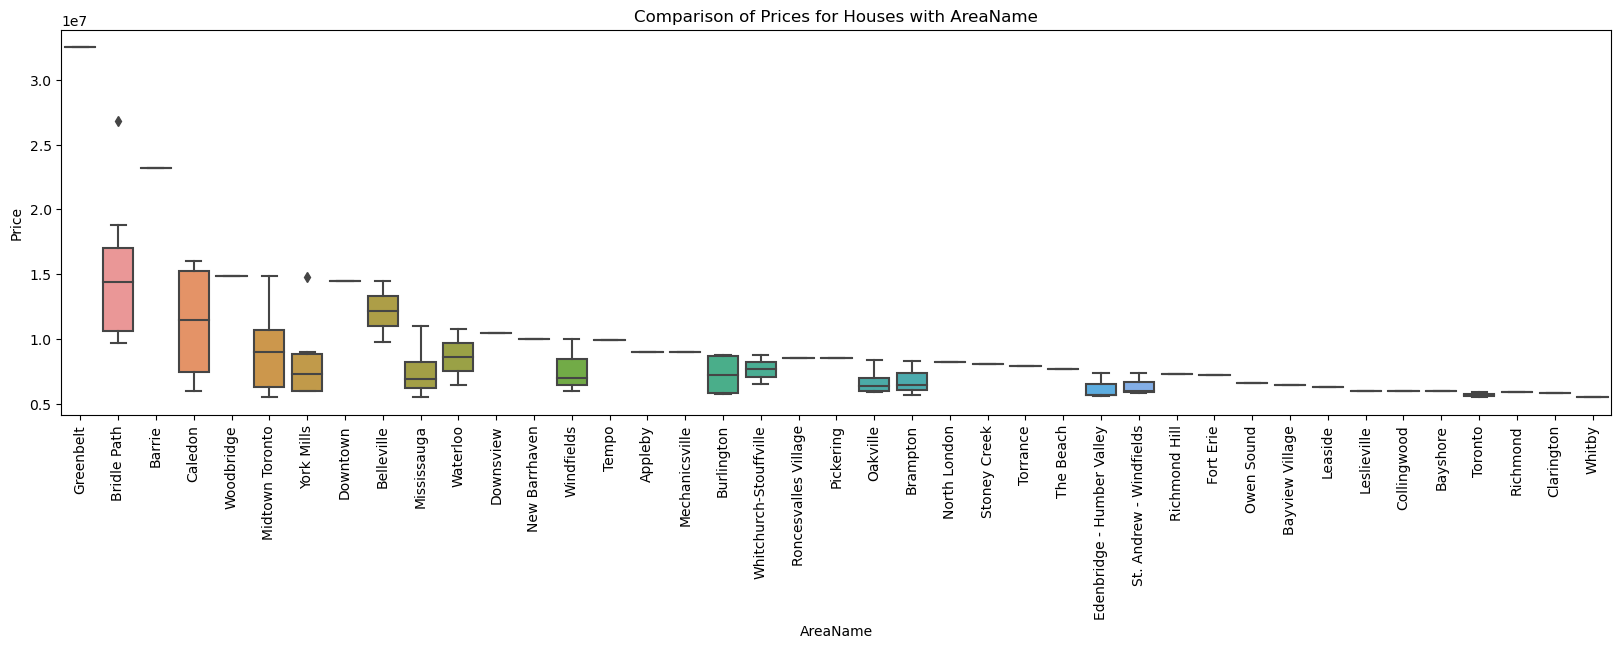

In [49]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the plot size
plt.figure(figsize=(20, 5))
# Create a boxplot to compare prices
sns.boxplot(x='AreaName', y='Price ($)', data=data_f.sort_values(by='Price ($)', ascending=False, axis=0).head(100))

plt.xticks(rotation=90)

# Set plot labels and title
plt.xlabel('AreaName')
plt.ylabel('Price')
plt.title('Comparison of Prices for Houses with AreaName')

# Show the plot
plt.show()


In [50]:
data_f.isnull().sum()

Address      0
AreaName     0
Price ($)    0
lat          0
lng          0
AreaCode     0
dtype: int64

In [51]:
!pip install folium

In [ ]:
import folium
from folium.plugins import MarkerCluster, HeatMap
# Create a base map
m = folium.Map(location=[data_f['lat'].mean(), data_f['lng'].mean()], zoom_start=12)

# Create a MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# Plot points on the map
for index, row in data_f.iterrows():
    folium.Marker([row['lat'], row['lng']],
                  popup=f"{row['AreaName']} - ${row['Price ($)']:,}",
                  icon=folium.Icon(color='blue')).add_to(marker_cluster)
# Create a HeatMap layer
heat_data = [[row['lat'], row['lng']] for index, row in data_f.iterrows()]

heatmap_layer = HeatMap(heat_data)

# Add the MarkerCluster and HeatMap layers to the map
marker_cluster.add_to(m)
heatmap_layer.add_to(m)


# Add Layer Control to toggle between MarkerCluster and HeatMap
folium.LayerControl(collapsed=True, control=False).add_to(m)


# Display the map
